In [1]:
import requests
from lxml import etree
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def string_year(year=2020):
    '''change year to the standard form used by arXiv, i.e, the last number of year'''
    a = str(year%100)
    if len(a)==1:
        a='0'+a
    return a
def string_month(month=1):
    '''change month to the standard form used by arXiv, 1-9 to 01-09'''
    a = str(month)
    if len(a)==1:
        a='0'+a
    return a
def num_papers(year=2019):
    '''return a list about the number of papers per month'''
    s_year=string_year(year)
    n_month=0
    if s_year=='20':
        n_month=3
    elif s_year=='92':
        n_month=10
    else:
        n_month=12
    url = 'https://arxiv.org/year/hep-ph/'+s_year
    r=requests.get(url).text
    s = etree.HTML(bytes(r, encoding='utf-8'))
    npapers=[]
    for i in range(n_month):
        ph = s.xpath('//*[@id="content"]/ul/li[' + str(i+1) + ']/b/text()')
        cross = s.xpath('//*[@id="content"]/ul/li[' + str(i+1) + ']/i/text()')
        npapers.append(int(ph[0])+int(cross[0]))
    return npapers

def download_paper_names(year=1999,month=1):
    '''download the name of papers and store in files'''
    s_year=string_year(year)
    s_month=string_month(month)
    
    n_papers = num_papers(year)
    if year==1992:
        i=n_papers[month-3]
    else:
        i=n_papers[month-1]
    ar_title = []
    url='https://arxiv.org/list/hep-ph/'+s_year + s_month+'?show='+str(i)
    r=requests.get(url).text
    s = etree.HTML(bytes(r, encoding='utf-8'))
    for index in range(i):
        raw = s.xpath('//*[@id="dlpage"]/dl/dd[' + str(index+1) + ']/div/div[1]/text()')[1]
        ar_title.append(raw[:-1])
        #print(index+1,raw[:-1])
    
    # write to file 
    with open('arXiv_data/data_'+s_year+s_month+'.txt', 'w') as f:
        for item in ar_title:
            #print(item)
            f.write('%s\n'%item)
    #return ar_title
def read_list_papers_month(year=1993,month=1):
    ''' read the names of paper from files at certain year and month'''
    s_year=string_year(year)
    s_month=string_month(month)
    with open('arXiv_data/data_'+s_year+s_month+'.txt', 'r') as f:
        while True:
            item = f.readline()
            if not item:
                break
            print(item.strip().lower())
def read_list_papers(year=1993):
    ''' read the names of paper from files at certain year'''
    s_year=string_year(year)
    list_papers=[]
    if year==1992:
        range_month=range(3,13)
    elif year==2020:
        range_month=range(1,4)
    else:
        range_month=range(1,13)
    
    for month in range_month:
        s_month=string_month(month)
        with open('arXiv_data/data_'+s_year+s_month+'.txt', 'r') as f:
            while True:
                item = f.readline()
                if not item:
                    break
                list_papers.append(item.strip().lower()) 
    return list_papers
def asked_number_of_papers(keys=['dark matter'],year=1995):
    '''return the number of paper satisfing keywords'''
    aaa=read_list_papers(year)
    ar_res=[]
    for title in aaa:
        res=[]
        for key in keys:
            if key in title:
                res.append(1)
            else:
                res.append(0)
        ar_res.append(res)
    return np.sum(np.array(ar_res),axis=0)

In [ ]:
# example : download, 
#the papers' name for 1992-2019 has already been downloaded and stored in arXiv_data
for month in range(3,4):
    download_paper_names(year=2020,month=month)
    print(month)

In [27]:
# example : inquire for the number of paper from 1992 to 2020
# it while take a while, about 1min
x = list(range(1992,2021))
y = [np.sum(num_papers(i)) for i in x]

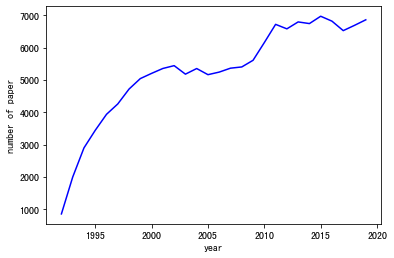

In [34]:
import matplotlib.pyplot as plt
plt.plot(x[:-1],y[:-1],'b-')
plt.xlabel('year')
plt.ylabel('number of paper')
plt.show()

In [37]:
# example: list number of paper with keyword
keys=['dark matter','higgs','neutrino','inflation','gravitational','black hole']
years=range(1992,2020)
ar = []
for year in years:
    temp = asked_number_of_papers(keys,year)
    print(year, ":", temp)
    ar.append(list(temp))

1992 : [ 7 55 55  9  7  1]
1993 : [ 20 144 101  18   7   3]
1994 : [ 36 148 133  24   3   3]
1995 : [ 35 189 176  45  15   4]
1996 : [ 37 178 213  49  18   7]
1997 : [ 40 215 265  60  14   4]
1998 : [ 65 193 417  74  24  17]
1999 : [ 46 201 481  91  25  17]
2000 : [ 78 195 528  69  35  28]
2001 : [ 81 226 546  94  26  34]
2002 : [ 73 249 539  88  29  68]
2003 : [ 81 230 516 123  41  41]
2004 : [133 310 496 105  38  44]
2005 : [147 273 460  99  30  55]
2006 : [180 277 492 109  42  63]
2007 : [196 333 420 114  36  49]
2008 : [250 282 391 133  43  41]
2009 : [405 315 412 113  51  40]
2010 : [357 380 400 163  55  59]
2011 : [392 457 604 140  45  37]
2012 : [406 651 515 132  46  37]
2013 : [454 723 529 155  54  38]
2014 : [510 638 522 334  51  30]
2015 : [569 686 543 227  60  34]
2016 : [494 522 596 173 109  47]
2017 : [597 484 546 181 131  63]
2018 : [618 435 551 170 149  83]
2019 : [618 398 606 156 185  98]


Text(0, 0.5, 'num of paper')

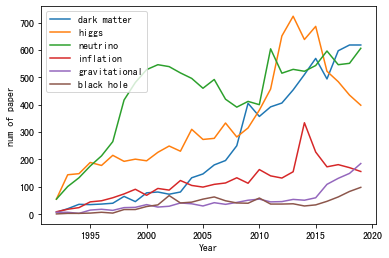

In [39]:
    for i in range(len(keys)):
        plt.plot(list(years),np.array(ar)[:,i],label=keys[i])
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('num of paper')